# PQC Haar Measure

In [2]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *
from quantum_circuits import *
from kraus_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
print(pqc_basic(3, 3))

      ┌────────────┐┌──────────────┐     ┌──────────────┐ ┌────────────┐»
q_0: ─┤ Ry(-1.595) ├┤ Rz(-0.67593) ├──■──┤ Ry(-0.80096) ├─┤ Rz(-2.007) ├»
     ┌┴────────────┤├─────────────┬┘┌─┴─┐└──────────────┘┌┴────────────┤»
q_1: ┤ Ry(-2.1799) ├┤ Rz(0.12155) ├─┤ X ├───────■────────┤ Ry(-0.5921) ├»
     └┬────────────┤├─────────────┤ └───┘     ┌─┴─┐      ├─────────────┤»
q_2: ─┤ Ry(-1.389) ├┤ Rz(-1.5184) ├───────────┤ X ├──────┤ Ry(0.43301) ├»
      └────────────┘└─────────────┘           └───┘      └─────────────┘»
«                          ┌─────────────┐ ┌────────────┐                    »
«q_0: ──────────────────■──┤ Ry(-1.3913) ├─┤ Rz(2.9407) ├─────────────────■──»
«     ┌─────────────┐ ┌─┴─┐└─────────────┘┌┴────────────┤┌─────────────┐┌─┴─┐»
«q_1: ┤ Rz(-1.9272) ├─┤ X ├───────■───────┤ Ry(-2.1526) ├┤ Rz(-1.9216) ├┤ X ├»
«     ├─────────────┴┐└───┘     ┌─┴─┐     ├─────────────┤├─────────────┤└───┘»
«q_2: ┤ Rz(-0.82994) ├──────────┤ X ├─────┤ Ry(-2.8497) ├┤ Rz(-1.5179) ├─────»
«     └─

In [10]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(0, 11):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

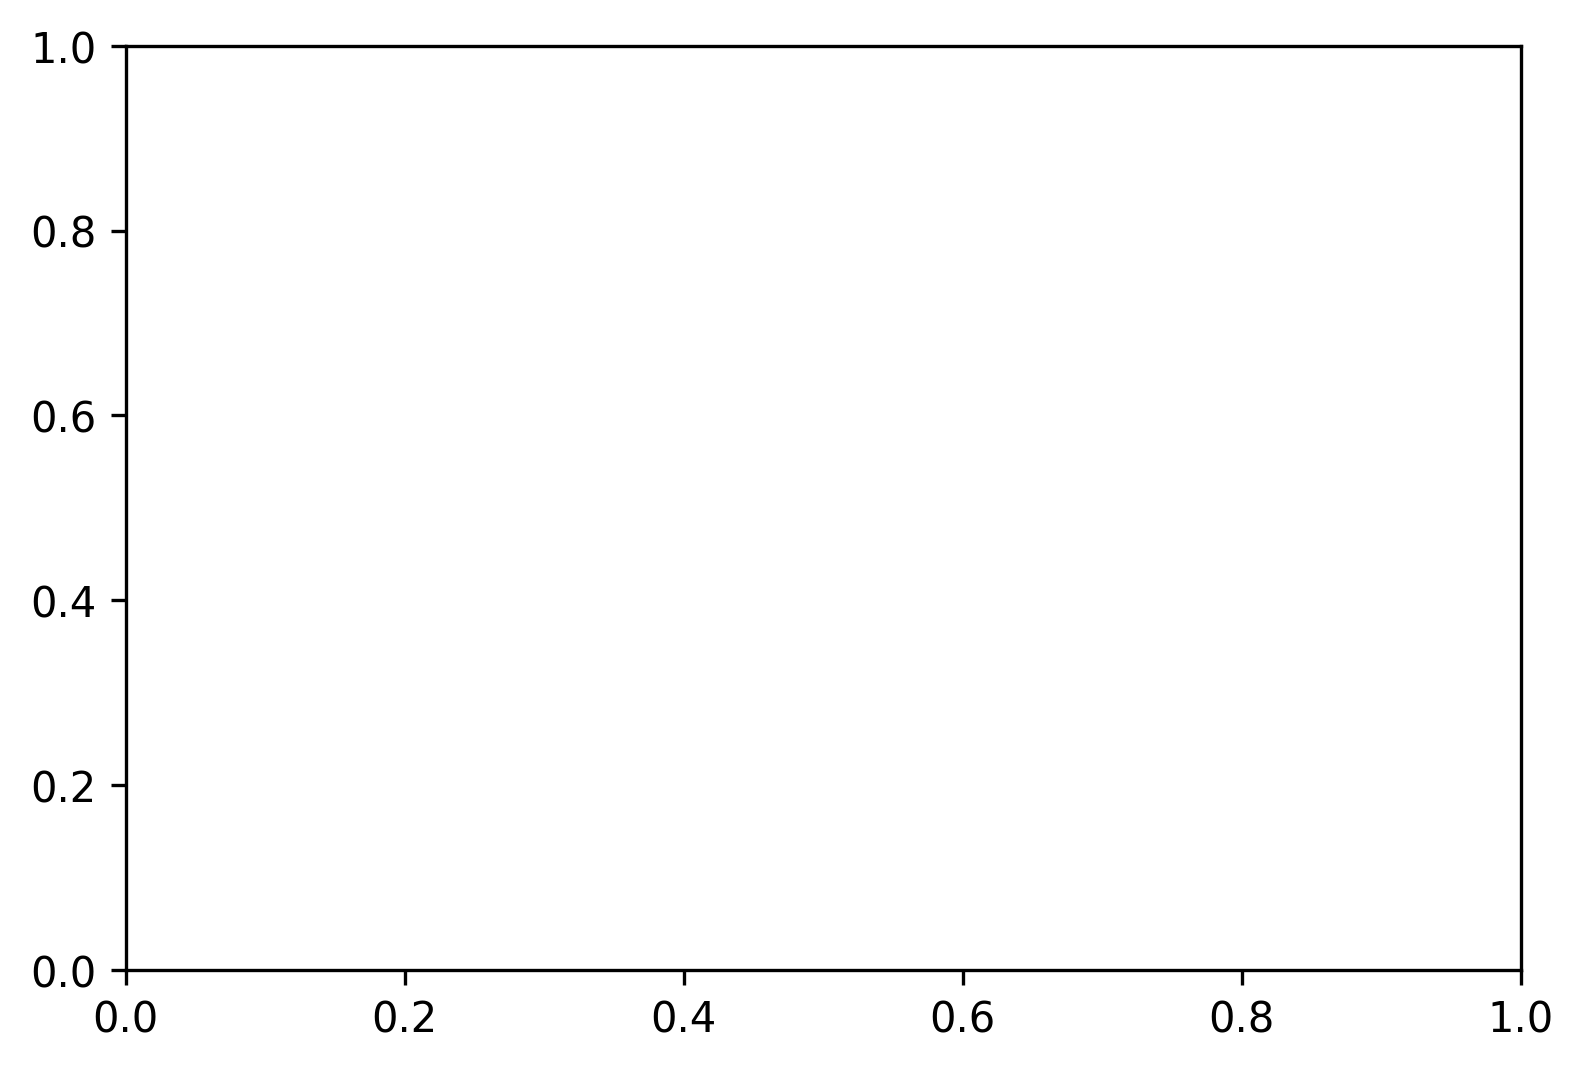

In [14]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list, "o-")
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig(image_path("PQC_Haar_approx_3qubits.pdf"), bbox_inches='tight')
plt.show()

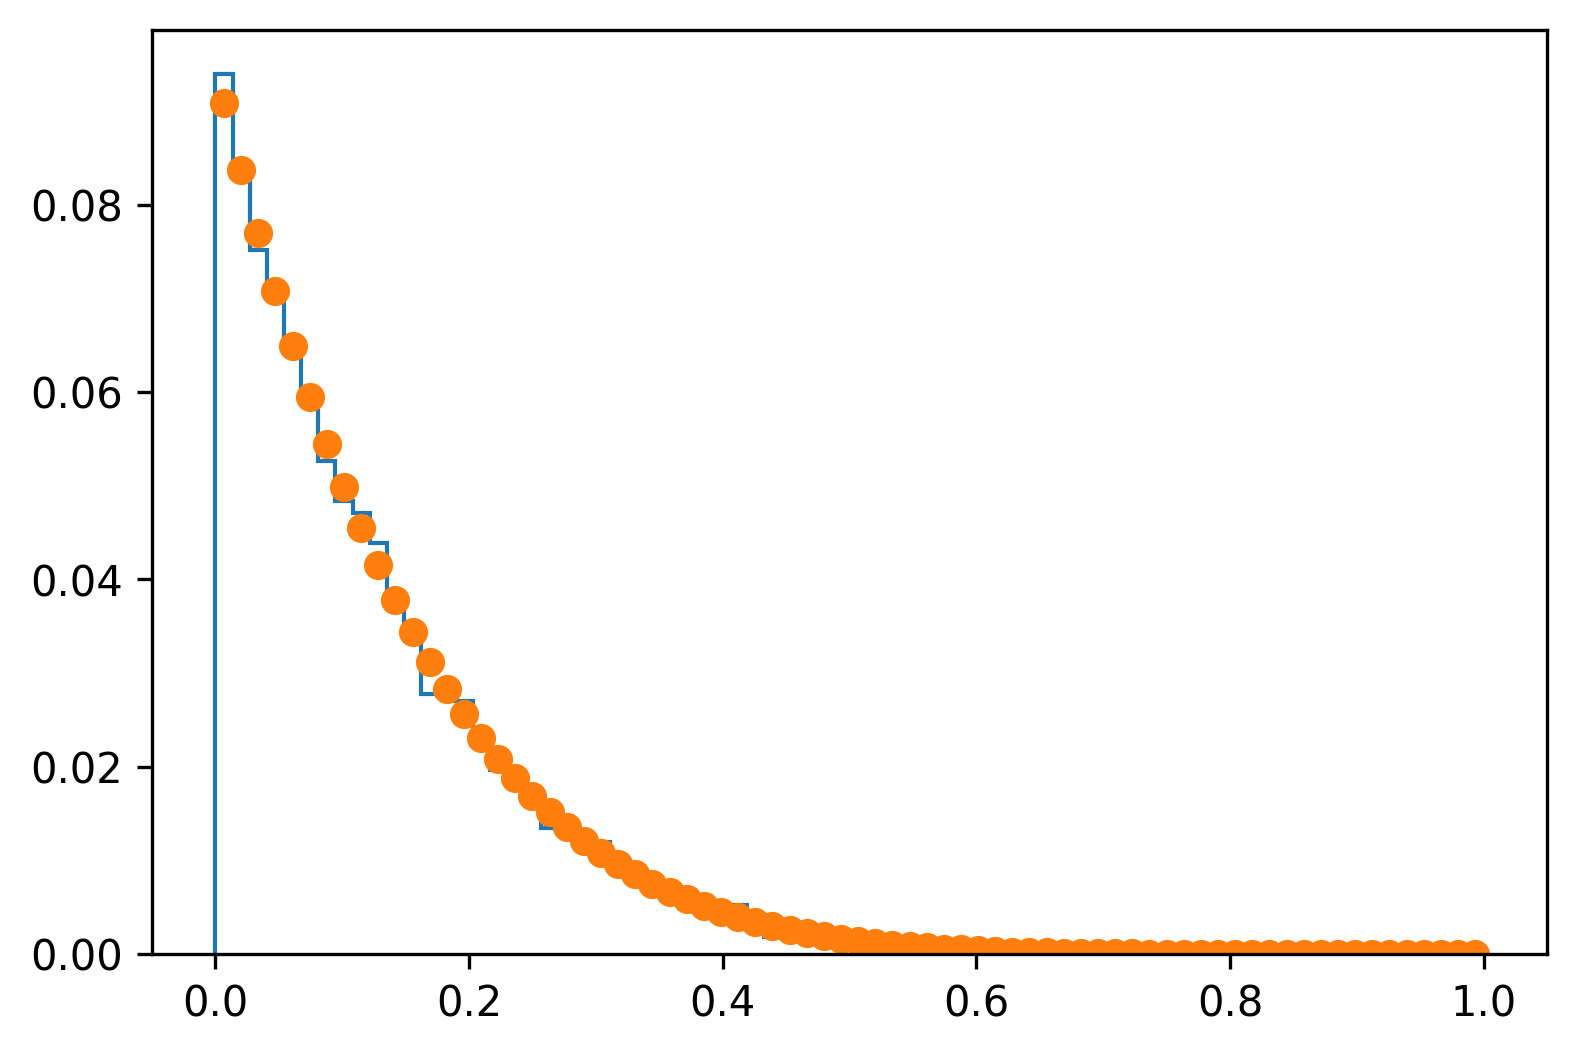

In [12]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.grid()
plt.savefig(image_path("PQC_Haar_approx_3qubits.pdf"), bbox_inches='tight')
plt.show()

In [23]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(0, 11):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list2 = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list2.append(KL)

haar_KL_mean = np.mean(KL_list2)
haar_KL_std = np.std(KL_list2)

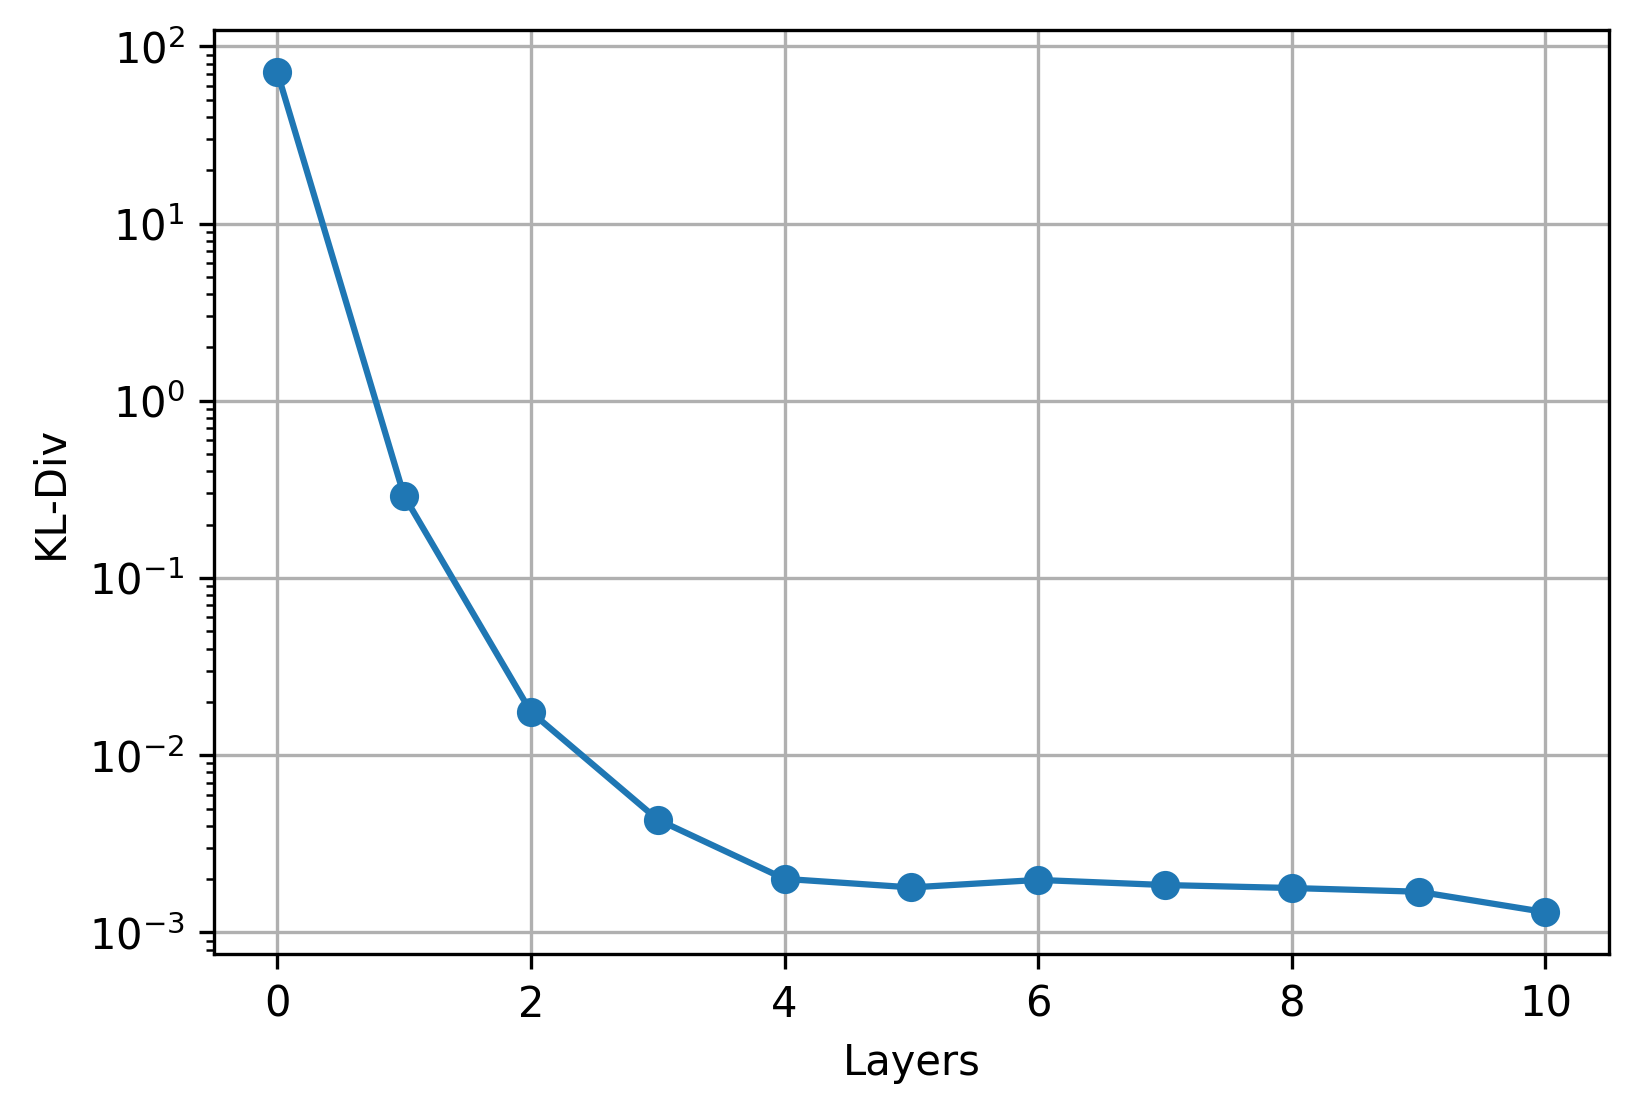

In [16]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(list(range(0,11)), KL_list, "o-")
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.yscale("log")
plt.savefig("PQC_Haar_approx_4qubits.pdf", bbox_inches='tight')
plt.show()

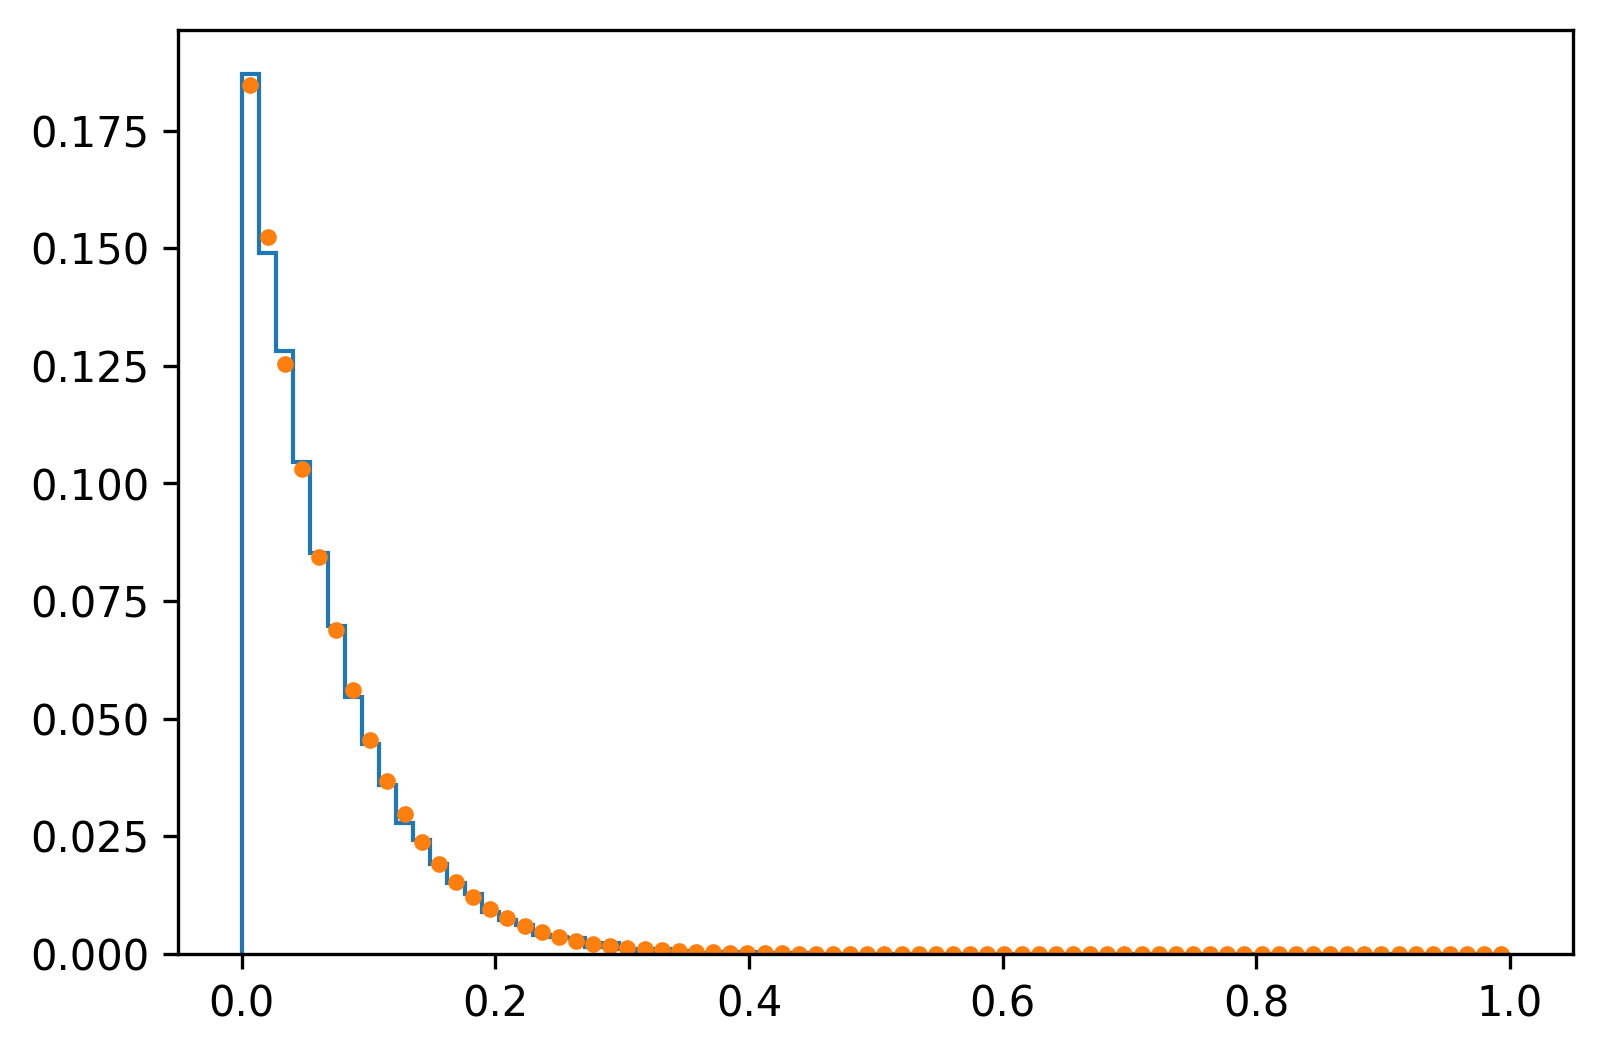

In [19]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o", markersize=3)
plt.show()

In [29]:
from qiskit.circuit.library import iSwapGate, XGate, YGate, HGate, CXGate, RGate

In [121]:
import numpy as np
from scipy.linalg import fractional_matrix_power, sqrtm
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
W = (X+Y)/np.sqrt(2)
W_prime = RGate(np.pi, np.pi/4).to_matrix()
np.abs(np.trace(W.T.conj()@W_prime))**2

4.0

In [122]:
import numpy as np
from scipy.linalg import fractional_matrix_power, sqrtm
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
W = fractional_matrix_power((X+Y)/np.sqrt(2),-1)
W_prime = RGate(-np.pi, np.pi/4).to_matrix()
np.abs(np.trace(W.T.conj()@W_prime))**2

4.000000000000002

In [147]:
import numpy as np
from scipy.linalg import fractional_matrix_power, sqrtm
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
V = sqrtm(-1j*(X-Y)/np.sqrt(2))
V_prime = RGate(np.pi/2, -np.pi/4).to_matrix()
np.abs(np.trace(V.T.conj()@V_prime))**2

4.0

In [144]:
print(V)
print(V_prime)

[[ 0.70710678+0.00000000e+00j  0.5       -5.00000000e-01j]
 [-0.5       -5.00000000e-01j  0.70710678-1.11022302e-16j]]
[[ 0.70710678+0.j   0.5       -0.5j]
 [-0.5       -0.5j  0.70710678+0.j ]]


In [170]:
A = (X-Y)/np.sqrt(2)
B = RGate(np.pi, -np.pi/4).to_matrix()
print(A)
print(B)
print(1j*B)

[[0.        +0.j         0.70710678+0.70710678j]
 [0.70710678-0.70710678j 0.        +0.j        ]]
[[ 6.12323400e-17+0.j          7.07106781e-01-0.70710678j]
 [-7.07106781e-01-0.70710678j  6.12323400e-17+0.j        ]]
[[0.        +6.12323400e-17j 0.70710678+7.07106781e-01j]
 [0.70710678-7.07106781e-01j 0.        +6.12323400e-17j]]


In [165]:
#X = np.array([[0, 1], [1, 0]])
#Y = np.array([[0, -1j], [1j, 0]])
#A = (X-Y)/np.sqrt(2)
#B = 1j*A

print(np.abs(np.trace(A.T.conj()@B)))

2.0


In [173]:
AA = sqrtm(A)
BB = sqrtm(B)
print(AA)
print(BB)

[[5.00000000e-01-5.00000000e-01j 1.11022302e-16+7.07106781e-01j]
 [7.07106781e-01-2.22044605e-16j 5.00000000e-01-5.00000000e-01j]]
[[ 0.70710678+5.55111512e-17j  0.5       -5.00000000e-01j]
 [-0.5       -5.00000000e-01j  0.70710678+1.66533454e-16j]]


In [174]:
print(np.abs(np.trace(AA.T.conj()@BB)))

4.742874840267547e-16


## Haar Finite Sampling error

In [22]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)


bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for i in range(10):
    fid_list = []
    for i in tqdm(range(10000)):
        U1 = Operator(random_unitary(d)).data
        U2 = Operator(random_unitary(d)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)

    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    KL_list.append(KL)

print(np.mean(KL_list), np.std(KL_list))

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

0.001941031110930487 0.0005013004058234007


In [20]:
KL_list

[]